In [5]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [17]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'GCARSOA1.MX'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [18]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,76.000000,72.410004,72.410004,75.489998,1763092.0,74.507072
2019-03-21,75.849998,74.900002,75.500000,75.559998,532845.0,74.576164
2019-03-22,76.000000,72.070000,75.550003,73.610001,376202.0,72.651550
2019-03-25,77.989998,73.620003,73.930000,75.550003,511638.0,74.566292
2019-03-26,75.459999,74.000000,75.199997,74.769997,391804.0,73.796440


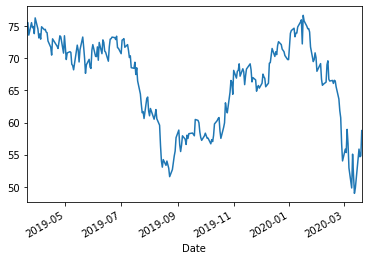

In [19]:
%matplotlib inline 
data.Close.plot()

In [22]:
def OM(df, n):
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))
    df = df.join(M)
    return df

In [23]:
df = OM(data, 50)

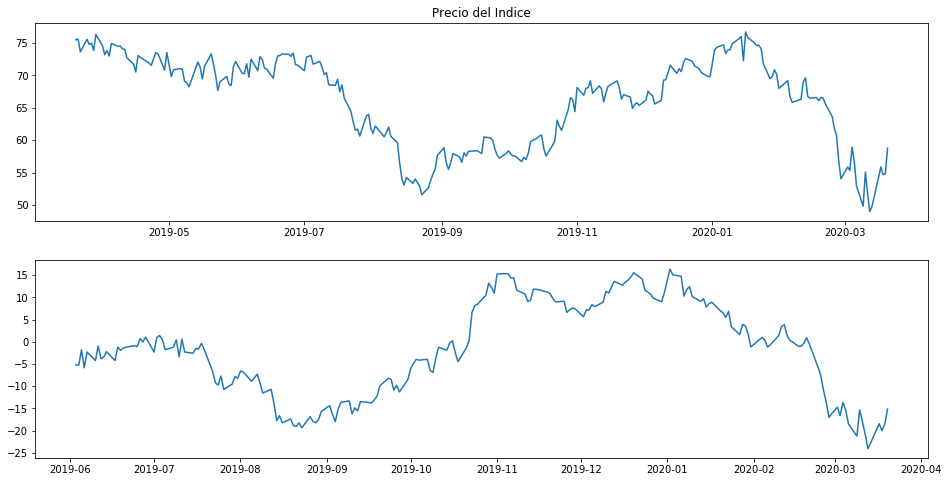

In [24]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df.Momentum_50)
plt.show()

In [28]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    return df

In [29]:
df2 = ROC(data, 50)

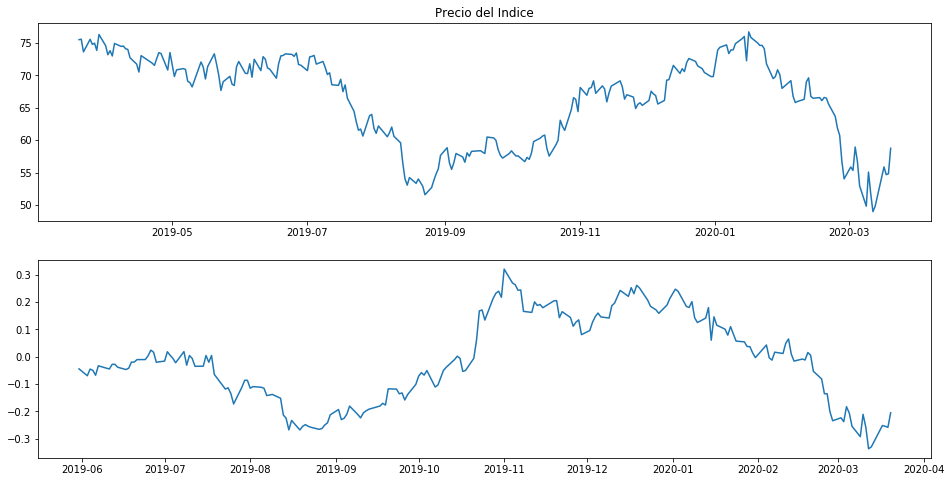

In [30]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.show()

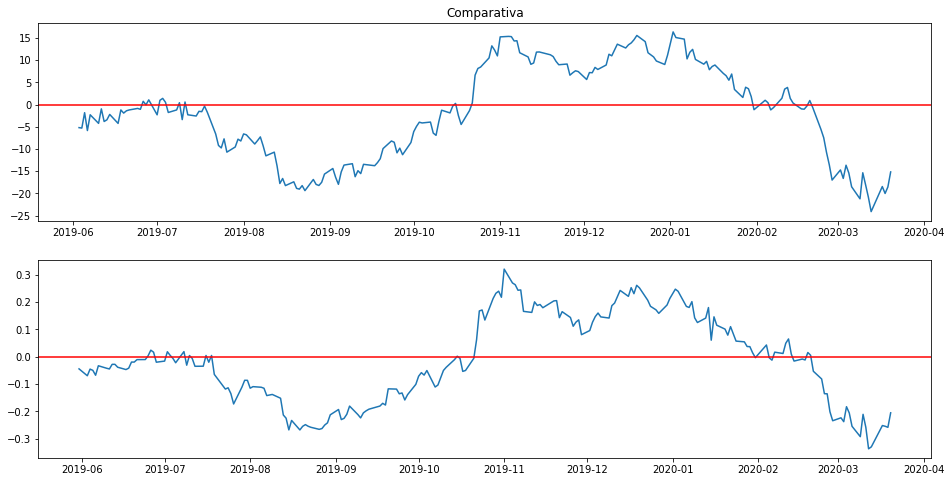

In [34]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df.Momentum_50)
plt.axhline(y=0, color= 'r')
plt.title('Comparativa')
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_50)
plt.axhline(y=0, color= 'r')
plt.show()